## Lab 2 : Clustering
### Darian Yang

Tasks:
1. Load the data and explore it.
2. Perform k-means clustering. Determine the optimal number of clusters using e.g. elbow method.
3. Perform clustering with different clustering methods implemented in Scikit Learn.
4. Now, try clustering with another distance metric (e.g. Cosine, Jaccard, etc). Hint: Think whether the default distance metric is appropriate for your data or not.
5. Visualize results using the dimensionality reduction (UMAP or tSNE) technique with respect to the cluster labels.
6. Compare clustering results. Try to rationalize observed commonalities or differences with respect to clustering methods and distance metrics.
    * Maybe I can compare using inertia or something based on the distance, inter-cluster distances maximized and intra-cluster distances minimized.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and Exploring the Dataset

In [3]:
df = pd.read_csv("Lab2_clustering_dataset.csv")
df

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,ZSRJHGJCRGZJNH-UHFFFAOYSA-N,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
965,ZTCGLAMYEAGAAN-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,1,1
966,ZVWRFVCNQOECJS-UHFFFAOYSA-N,1,0,1,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
967,ZXAGZULZCKUUKQ-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


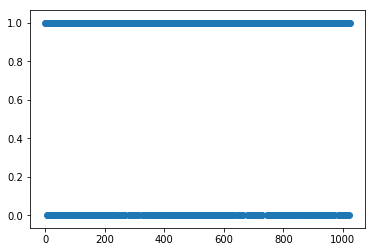

In [5]:
# first row
plt.scatter(range(0, len(df.iloc[0,1:])), df.iloc[0,1:])
plt.show()

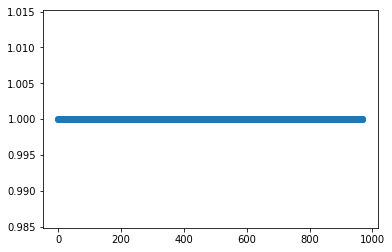

In [6]:
# first column
plt.scatter(range(0, len(df.iloc[:,1])), df.iloc[:,1])
plt.show()

Seems like the data is all binary, I need to transform it in some way to better analyze it. My first thoughts are to either standardize it (Z-score) or to maybe run PCA and then analyze the PCA value per column. I'll try standardizing for now.

Scikit-learn has a few nice scaler functions, lets use standard scaler, which scales by calculating the Z-score (z = (x - $\mu$) / $\sigma$).

In [7]:
# first drop the ID column
df = df.drop("ID",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1024 entries, D_0 to D_1023
dtypes: int64(1024)
memory usage: 7.6 MB


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 0.        ,  0.33161067,  0.        , ...,  0.4857668 ,
         0.46619383,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ...,  0.4857668 ,
         0.46619383,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ..., -2.05860094,
         0.46619383,  0.31008684],
       ...,
       [ 0.        , -3.01558452,  0.        , ..., -2.05860094,
        -2.14503055,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ...,  0.4857668 ,
         0.46619383,  0.31008684],
       [ 0.        ,  0.33161067,  0.        , ..., -2.05860094,
         0.46619383,  0.31008684]])

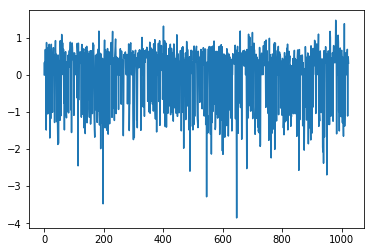

In [13]:
plt.plot(df_scaled[0])

## K-means Clustering

In [16]:
from sklearn.cluster import KMeans

Have to use the correct amount of clusters, can do this using the elbow method.

In [19]:
# get the inertia values for a range of k values
inertia = [KMeans(n_clusters=k).fit(df_scaled).inertia_ for k in range(1, 21)]
inertia

[920550.0000000005,
 792335.226138066,
 669279.0567315551,
 581753.3571139674,
 519463.57326928637,
 464913.65146482387,
 417379.20769251796,
 376312.65939958696,
 344909.55233382765,
 326120.41589188785,
 309377.24198695854,
 301498.57800736657,
 289153.84889023495,
 282061.1976705267,
 276322.64456202486,
 264850.72562078835,
 261387.68344814464,
 257274.01199946232,
 249796.86792618295,
 246449.0484501577]

Text(0,0.5,'inertia')

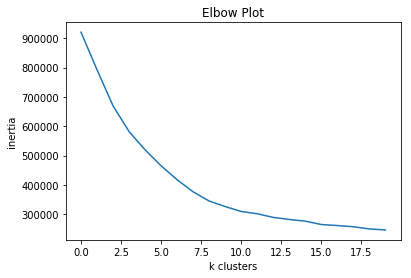

In [21]:
plt.plot(inertia)
plt.title("Elbow Plot")
plt.xlabel("k clusters")
plt.ylabel("inertia")

From the elbow plot, maybe k = 8 would be appropriate for this data.

In [23]:
km8 = KMeans(n_clusters=8).fit(df_scaled)